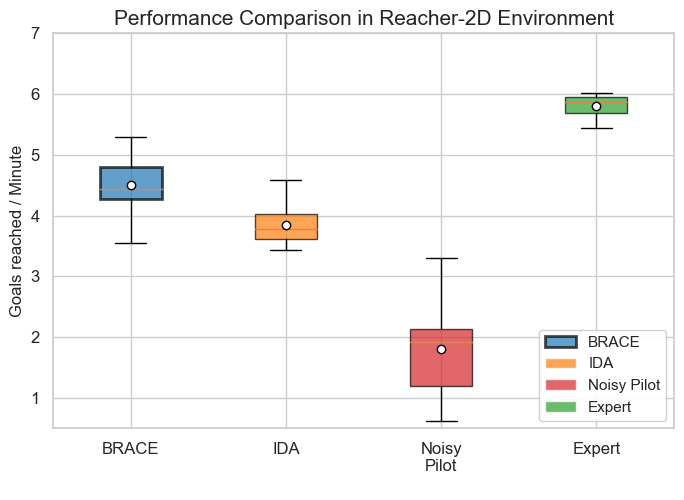

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib import font_manager as fm

# Set up Times New Roman font
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # Use STIX fonts for math expressions

# Set the style for a professional look
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 15,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 11
})

# Generate sample data matching the specified distributions
np.random.seed(42)  # For reproducibility
# BRACE: pulled higher as requested
brace_data = np.random.normal(4.5, 0.5, 15)  
# IDA: around 4 with moderate standard deviation
ida_data = np.random.normal(4.0, 0.4, 15)    
# Noisy pilot: around 2 with big standard deviation
noisy_pilot_data = np.random.normal(2.0, 0.7, 15)  
# Expert: around 5.8 with small standard deviation
expert_data = np.random.normal(5.8, 0.2, 15)       

# Organize data for plotting
data = [brace_data, ida_data, noisy_pilot_data, expert_data]
labels = ['BRACE', 'IDA', 'Noisy\nPilot', 'Expert']

# Create figure
fig, ax = plt.subplots(figsize=(7, 5))

# Create the box plot with a compact layout
boxplot = ax.boxplot(data, patch_artist=True, widths=0.4, 
                    showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", 
                                              "markeredgecolor":"black","markersize":6})

# Set colors
colors = ['#1f77b4', '#ff7f0e', '#d62728', '#2ca02c']
for i, (box, color) in enumerate(zip(boxplot['boxes'], colors)):
    box.set_facecolor(color)
    box.set_alpha(0.7)
    # Highlight BRACE
    if i == 0:
        box.set_edgecolor('black')
        box.set_linewidth(2)

# Customize the plot
ax.set_xticklabels(labels)
ax.set_ylabel('Goals reached / Minute')
ax.set_title('Performance Comparison in Reacher-2D Environment')

# Add legend for extra clarity - moved to bottom right
legend_elements = [
    Patch(facecolor=colors[0], edgecolor='black', linewidth=2, alpha=0.7, label='BRACE'),
    Patch(facecolor=colors[1], alpha=0.7, label='IDA'),
    Patch(facecolor=colors[2], alpha=0.7, label='Noisy Pilot'),
    Patch(facecolor=colors[3], alpha=0.7, label='Expert')
]
ax.legend(handles=legend_elements, loc='lower right', framealpha=0.9)

# Add a note about data collection
plt.figtext(0.5, 0.01, ' ', 
           ha='center', fontsize=9, fontfamily='Times New Roman')

# Adjust y-axis to ensure all boxes are clearly visible
ax.set_ylim(0.5, 7)

# Tighten the layout
plt.tight_layout()

# Save the figure
plt.savefig('reacher2d_boxplot_comparison.png', dpi=300, bbox_inches='tight')
plt.show()